In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('international-airline-passengers.csv')


In [2]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
# Load and clean
df = pd.read_csv('international-airline-passengers.csv', skiprows=1)
df.columns = ['Month', 'Passengers']
df.dropna(inplace=True)

In [6]:
df.head()

,Passengers
Month,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


In [4]:
# Convert types
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')
df['Passengers'] = pd.to_numeric(df['Passengers'], errors='coerce')
df.dropna(inplace=True)
df.set_index('Month', inplace=True)
df = df.asfreq('MS')

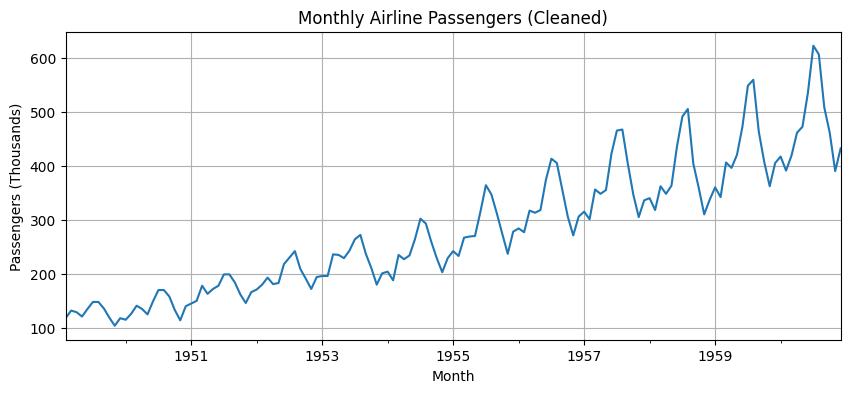

In [5]:
# Visualize cleaned data
df.plot(title='Monthly Airline Passengers (Cleaned)', figsize=(10, 4), legend=False)
plt.ylabel('Passengers (Thousands)')
plt.grid(True)
plt.show()

       Passengers
count  143.000000
mean   281.475524
std    119.550851
min    104.000000
25%    180.500000
50%    267.000000
75%    361.000000
max    622.000000


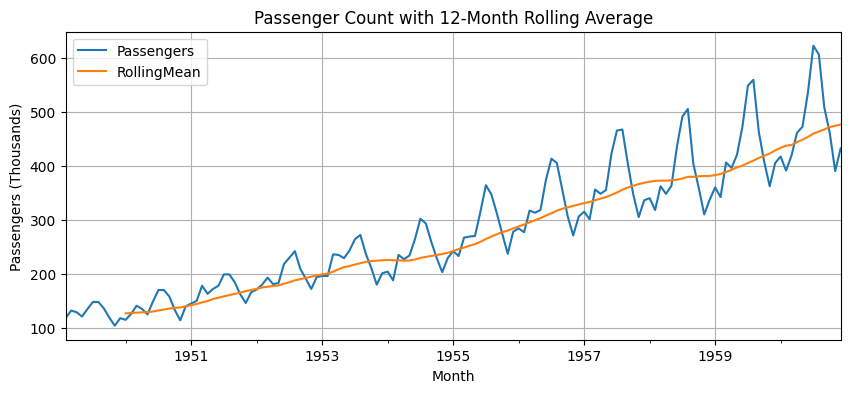

In [7]:
# Basic stats
print(df.describe())

# Moving average trend
df['RollingMean'] = df['Passengers'].rolling(window=12).mean()

df[['Passengers', 'RollingMean']].plot(title='Passenger Count with 12-Month Rolling Average', figsize=(10, 4))
plt.ylabel('Passengers (Thousands)')
plt.grid(True)
plt.show()


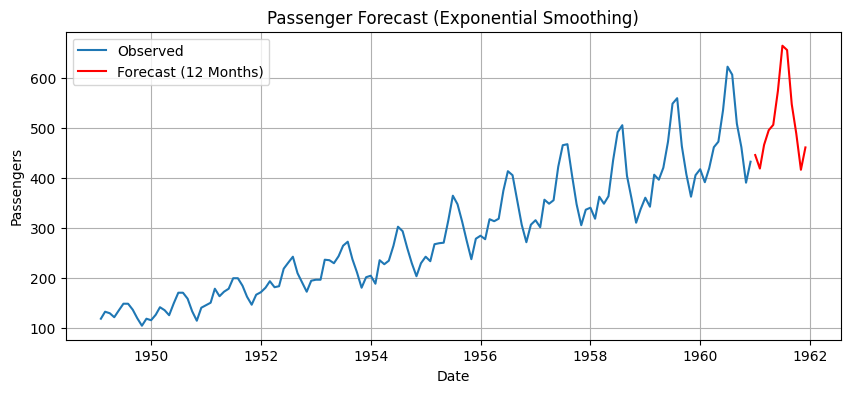

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df['Passengers'], trend='add', seasonal='mul', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(12)

# Plot forecast
plt.figure(figsize=(10, 4))
plt.plot(df['Passengers'], label='Observed')
plt.plot(forecast, label='Forecast (12 Months)', color='red')
plt.title('Passenger Forecast (Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from sklearn.metrics import mean_absolute_error

# Forecast on last 12 months for validation
train = df[:-12]
test = df[-12:]

model_eval = ExponentialSmoothing(train['Passengers'], trend='add', seasonal='mul', seasonal_periods=12)
fit_eval = model_eval.fit()
pred_eval = fit_eval.forecast(12)

mae = mean_absolute_error(test['Passengers'], pred_eval)
print(f"MAE on last 12 months: {mae:.2f}")


MAE on last 12 months: 10.65
